### 문제이름
제곱수의 합

### 링크
https://www.acmicpc.net/problem/1699

### 예시 코드
|input|result|
|---|---|
7|4|
1|1|
4|1
11|3
13|2

## 재귀함수

1. 팩토리얼 함수 만들기

In [4]:
def factorial_func(num):
    if num <= 1:
        return 1
    else:
        return num * factorial_func(num-1)

factorial_func(5)

120

2. 최대공약수 구하기 - 유클리드 호제법

In [37]:
def GCD_func(a, b):
    big, small = max(a, b), min(a, b)

    if big%small == 0: # 나머지가 0이면 나누는 값이 최대 공약수 
        return small

    # 그렇지 않으면, 나머지가 0아 될때까지
    # 나누는 Q를 나머지 R로 나눈다
    return GCD_func(small, big % small)
    
GCD_func(162 ,30)

6

## DFS 깊이 우선 탐색
1. 스택 이용
- 탐색 시작 노드를 스택에 삽입하고 방문처리
- 스택 최상단 노드에 방문하지 않는 인접한 노드가 하나라도 있으면, 그 노드를 스택에 넣고 방문처리한다. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다.
2. 재귀함수 이용
- 더 이상 2번의 과정을 수행할 수 없을 때까지 반복한다


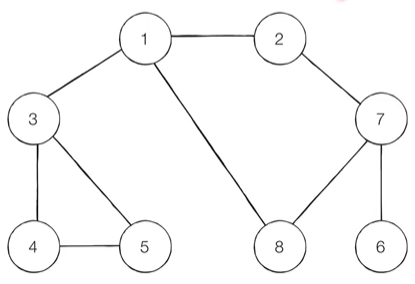

In [41]:
def dfs(graph, start, visited):
    visited[start] = True #현재 노드 방문처리
    print(start, end = " ")
    for i in graph[start]: #현재 노드와 연결된 다른 노드를 재귀적으로 방문
        if not visited[i]:
            dfs(graph, i, visited)

#인덱스가 현재 위치고, 인전 노드를 리스트로 나열한 것
graph = [[], [2,3,8], [1,7], [1,4,5], [3,5], [3,4], [7], [2,6,8], [1,7]]
visited = [False] * len(graph)
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

## BFS 너비 우선 탐색
1. 스택 이용
- 탐색 시작 노드를 큐에 삽입하고 방문처리
- 큐에서 노드를 꺼낸 뒤에 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리한다
2. 재귀함수 이용
- 더 이상 2번의 과정을 수행할 수 없을 때까지 반복한다


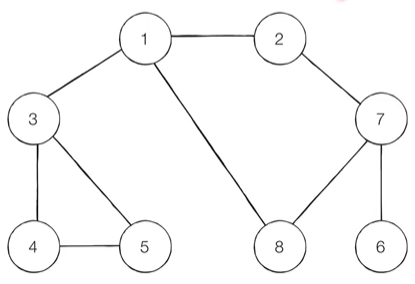

In [44]:
# 작은 번호부터 넣는다
from collections import deque
def bfs(graph, start, visited):
    queue = deque([start])
    visited[start] = True #현재 노드 방문처리
    
    while queue:
        start = queue.popleft()
        print(start, end = " ")
        # 방문하지 않는 인접 원소, 큐에 삽입
        for i in graph[start]: 
            if not visited[i]:
                queue.append(i)
                visited[i] = True
        

#인덱스가 현재 위치고, 인전 노드를 리스트로 나열한 것
graph = [[], [2,3,8], [1,7], [1,4,5], [3,5], [3,4], [7], [2,6,8], [1,7]]
visited = [False] * len(graph)
bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

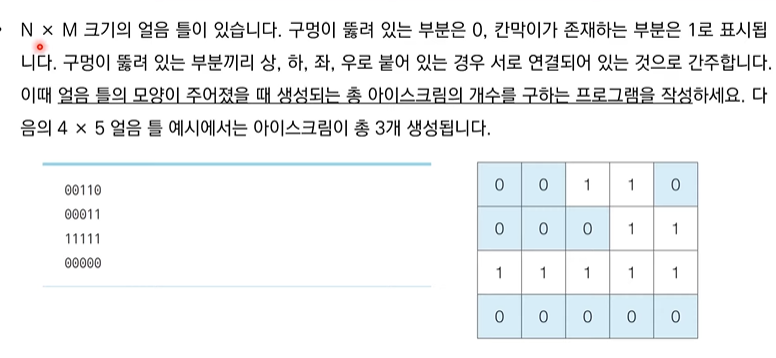

In [49]:
n, m = 4, 5
input = [[0,0,1,1,0], [0,0,0,1,1], [1,1,1,1,1], [0,0,0,0,0]]

def check(x,y):
    # 주어진 범위에서 벗어난 경우
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    # 현재 도느를 방문했는가
    if input[x][y] == 0:
        input[x][y] = 1
        check(x-1, y) #좌로 한칸
        check(x, y-1) #아래로 한칸
        check(x+1, y) #우로 한칸
        check(x, y+1) #위로 한칸
        return True 
    return False


cnt = 0
for i in range(n):
    for j in range(m):
        if check(i, j) == True:
            cnt += 1
print(cnt) 

3


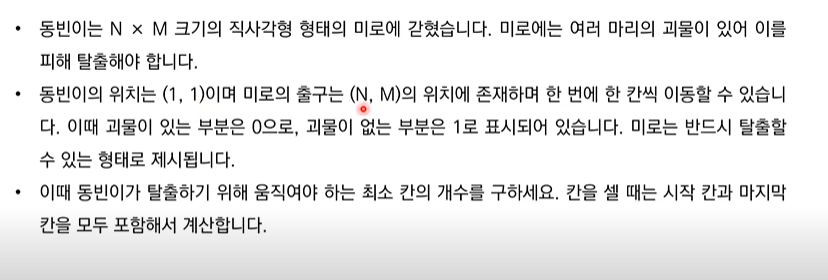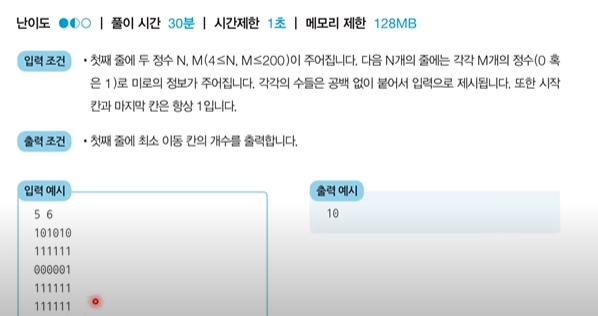

In [55]:
from collections import deque

n, m = 5,6
input = [[1,0,1,0,1,0], [1,1,1,1,1,1], [0,0,0,0,0,1], 
         [1,1,1,1,1,1], [1,1,1,1,1,1]]

dx = [-1, 1, 0, 0] #상 하 좌 우
dy = [0, 0, -1, 1]

def bfs(x,y):
    queue = deque()
    queue.append((x, y))

    while queue:
        x, y = queue.popleft()
        for i in range(4):
            nx = x + dx[i] # 좌우
            ny = y + dy[i] # 상하
            if nx < 0 or nx >= n or ny < 0 or ny >= m:
                continue
            if input[nx][ny] == 0:
                continue
            if input[nx][ny] == 1:
                input[nx][ny] = input[x][y] + 1
                queue.append((nx, ny))
    return input[n-1][m-1]
            

print(bfs(0,0))
    
            

10


상하좌우 문제  

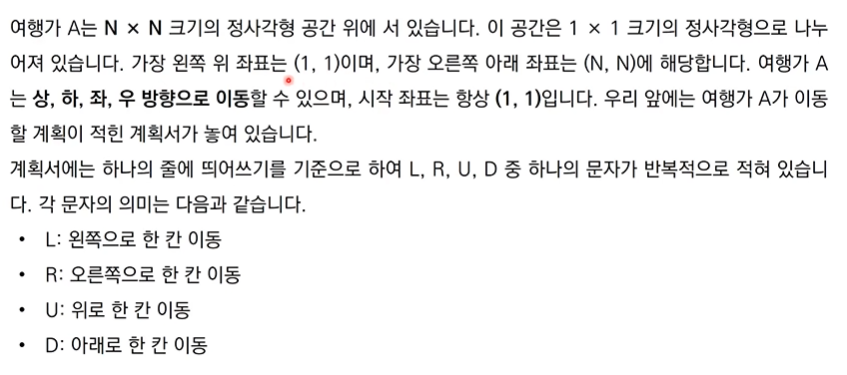  
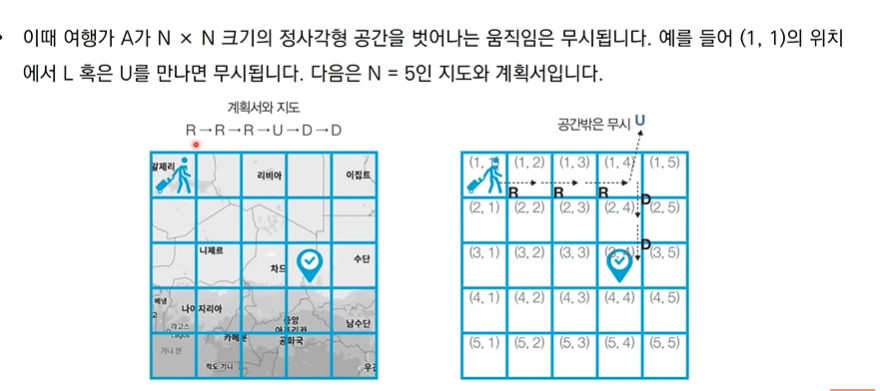

In [57]:
n = 5
plans = "R R R U D D".split()
x, y = 1,1

dx = [0, 0, -1, 1]
dy = [-1, 1, 0, 0] #상 하 좌 우
move = "L R U D".split()

for plan in plans:
    for i in range(len(move)):
        if plan == move[i]:
            nx = x + dx[i]
            ny = y + dy[i]
    if nx < 1 or nx >= n or ny < 1 or ny >= n:
        continue
    x, y = nx, ny

print(x, y)

3 4
